<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_tracking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://covidtracking.com/api

In [2]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np

In [3]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-07-07 23:37:08.559520


In [4]:
current_states = request.get('https://covidtracking.com/api/v1/states/current.json')
current_states_daily = request.get('https://covidtracking.com/api/v1/states/daily.json')
current_us = request.get('https://covidtracking.com/api/v1/us/current.json')

In [5]:
states = pd.DataFrame.from_dict(current_states.json())
states_daily = pd.DataFrame.from_dict(current_states_daily.json())
us = pd.DataFrame.from_dict(current_us.json())

In [6]:
states_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200707,AK,1184.0,130236.0,NaN,25.0,NaN,NaN,NaN,1.0,NaN,560.0,A,7/6/2020 00:00,2020-07-06T00:00:00Z,07/05 20:00,17.0,NaN,2020-07-06T00:00:00Z,131420.0,NaN,NaN,NaN,02,46,7621,131420,131420,7667,131420,1,0,7c7ab728f94cde83c2cd769a80f5de03648a7feb,0,0,0,0,0,
1,20200707,AL,45785.0,415579.0,NaN,1073.0,2961.0,NaN,858.0,NaN,479.0,22082.0,B,7/7/2020 11:00,2020-07-07T11:00:00Z,07/07 07:00,1033.0,2961.0,2020-07-07T11:00:00Z,NaN,NaN,NaN,45263.0,01,907,5362,461364,461364,6269,461364,26,47,8d8164f1d3922f1d9d55fff0e476fd676e62b009,0,0,0,0,0,
2,20200707,AR,24512.0,326143.0,NaN,369.0,1604.0,NaN,NaN,81.0,247.0,17834.0,A,7/7/2020 16:18,2020-07-07T16:18:00Z,07/07 12:18,292.0,1604.0,2020-07-07T16:18:00Z,350396.0,NaN,NaN,24512.0,05,259,5428,350655,350655,5687,350655,0,29,6cf299ce4e2a1d516a567a7cccc4ede3f04cb94e,0,0,0,0,0,
3,20200707,AS,0.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,7/1/2020 00:00,2020-07-01T00:00:00Z,06/30 20:00,0.0,NaN,2020-07-01T00:00:00Z,NaN,NaN,NaN,NaN,60,0,0,696,696,0,696,0,0,2973dc8e4ea04137bef2fe10b8f00d33995bd48d,0,0,0,0,0,
4,20200707,AZ,105094.0,523703.0,NaN,3356.0,5272.0,869.0,NaN,544.0,NaN,12260.0,A+,7/7/2020 00:00,2020-07-07T00:00:00Z,07/06 20:00,1927.0,5272.0,2020-07-07T00:00:00Z,628275.0,NaN,NaN,104572.0,04,3653,7303,628797,628797,10956,628797,117,84,7711d5a0f515f4ef6851368c3277989767f4800f,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6956,20200126,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,53,0,0,2,2,0,2,0,0,760c3dc0f1be8778f30b6d200547f3b5ac745758,0,0,0,0,0,
6957,20200125,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,53,0,0,2,2,0,2,0,0,8c8515283dd7f193d5ec506f4d6ef8334bc50770,0,0,0,0,0,
6958,20200124,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,53,0,0,2,2,0,2,0,0,01659896e63df6a3a877a4c826167fe0e44cb8a8,0,0,0,0,0,
6959,20200123,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,53,0,0,2,2,0,2,0,0,b8c2a13e67216abb871b61007e5a22ff3828a041,0,0,0,0,0,


In [7]:
ny_daily = states_daily.loc[states_daily['state'] == 'NY']

In [8]:
ny_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
37,20200707,NY,398237.0,3946630.0,NaN,836.0,89995.0,160.0,NaN,103.0,NaN,71091.0,A,7/6/2020 23:59,2020-07-06T23:59:00Z,07/06 19:59,24924.0,89995.0,2020-07-06T23:59:00Z,NaN,NaN,NaN,398237.0,36,588,56148,4344867,4344867,56736,4344867,11,0,2b2a225f8b63f528dea6f828c18cf73038539e2f,0,0,0,0,0,
93,20200706,NY,397649.0,3890482.0,NaN,817.0,89995.0,170.0,NaN,103.0,NaN,71040.0,A,7/5/2020 23:59,2020-07-05T23:59:00Z,07/05 19:59,24913.0,89995.0,2020-07-05T23:59:00Z,NaN,NaN,NaN,397649.0,36,518,53810,4288131,4288131,54328,4288131,9,0,c6888dc84ffdd4847e653b21f88103eec85272c1,0,0,0,0,0,
149,20200705,NY,397131.0,3836672.0,NaN,832.0,89995.0,178.0,NaN,116.0,NaN,70968.0,A,7/4/2020 23:59,2020-07-04T23:59:00Z,07/04 19:59,24904.0,89995.0,2020-07-04T23:59:00Z,NaN,NaN,NaN,397131.0,36,533,62882,4233803,4233803,63415,4233803,8,0,1c5afdff7b2fa69f33845a746e76693738e8d3be,0,0,0,0,0,
205,20200704,NY,396598.0,3773790.0,NaN,844.0,89995.0,190.0,NaN,119.0,NaN,70877.0,A,7/3/2020 23:59,2020-07-03T23:59:00Z,07/03 19:59,24896.0,89995.0,2020-07-03T23:59:00Z,NaN,NaN,NaN,396598.0,36,726,61677,4170388,4170388,62403,4170388,11,0,cdea554b3269e7cb8187a1a5c365272483900662,0,0,0,0,0,
261,20200703,NY,395872.0,3712113.0,NaN,857.0,89995.0,188.0,NaN,125.0,NaN,70794.0,A,7/2/2020 23:59,2020-07-02T23:59:00Z,07/02 19:59,24885.0,89995.0,2020-07-02T23:59:00Z,NaN,NaN,NaN,395872.0,36,918,65474,4107985,4107985,66392,4107985,8,0,6bf505e26be3f1cd6e0ffa88eb3f85864b177b7e,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6771,20200308,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,36,29,0,197,197,29,197,0,0,901829a9e5fc464f6cc681700414c402be4a3e5a,0,0,0,0,0,
6821,20200307,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,36,43,0,404,168,43,168,0,0,d89d4fd0f52a89a9ec4eb9c5b53aeacb0ca734a0,0,0,0,0,0,
6861,20200306,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,36,11,16,361,125,27,125,0,0,f94d42b35ad1ddda0119f8f6d1e1f279da1c2c6e,0,0,0,0,0,
6888,20200305,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,36,16,28,122,98,44,98,0,0,752b04989071ad3abf68fa8717a64db82895cced,0,0,0,0,0,


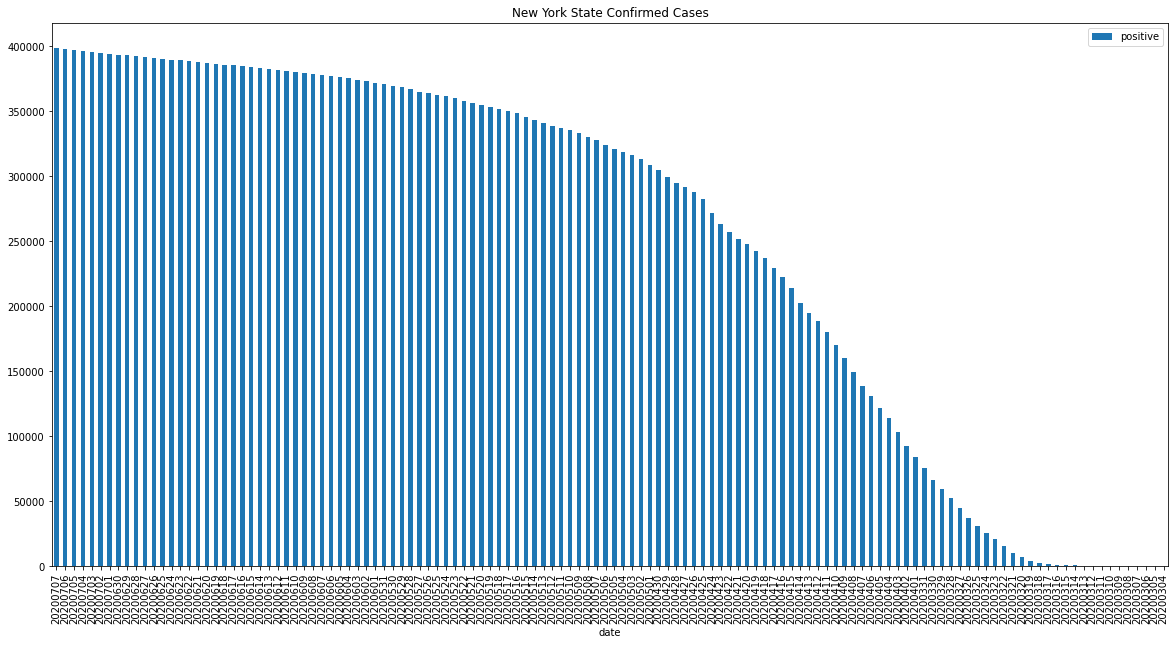

In [11]:
ny_daily.plot(x='date', y='positive', kind='bar', title='New York State Confirmed Cases', figsize=(20,10))